# Principal Components Analysis

## Table of Contents:
1. [Background reading](#background-reading)
    
    
2. [Dataset](#dataset)
    
    
3. [Essence of Data](#essence-of-data)
    
     3.1 [What is PCA?](#what-is-pca)
    
     3.2 [How does PCA work?](#how-does-pca-work)

     3.3 [Examples of application](#examples-of-application)
    
     3.4 [Example Code](#example-code)

        
4. [PCA and Privacy](#pca-and-privacy)

## Background reading:

**Suggested Reading:**

*Intro to Statistical Learning*: Chapter 6, Principal Components Regression (Sections 6.3.1, Page 252-259)

*Intro to Statistical Learning*: Chapter 12, Principal Components Analysis (Sections 12.2, Page 498-510)

## Dataset:
The first two examples use the generated random data to mask PCA steps

The third example uses winequality of red
https://archive.ics.uci.edu/ml/datasets/wine+quality

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality

## Essence of Data:

**What is PCA?**
Principal components analysis (PCA) is a popular approach for deriving a low-dimensional set of features from a large set of variables. While retaining the maximum amount of information, it improves the interpretability of data and realizes the visualization of multidimensional data.

**How does PCA work?**
Article: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

1. Standardized (decentralized) initial data
2. Calculate covariance matrix of standardized data to identify correlation
3. Calculate eigenvectors and eigenvalues of covariance matrix to identify principal components
4. Create feature vectors to determine which principal components to retain
5. Recast data along the principal component axis

Derivation of PCA using the covariance method

Basic equation
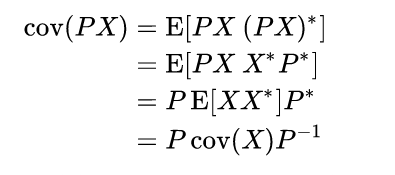

Image interpretation
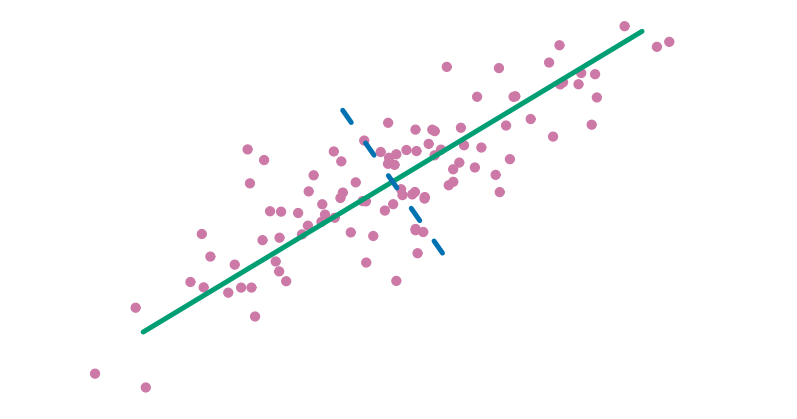




### Examples of application?
**Article:** 

https://towardsdatascience.com/principal-component-analysis-algorithm-in-real-life-discovering-patterns-in-a-real-estate-dataset-18134c57ffe7


Use PCA to study the reasons why some properties have not been sold for a long time.

https://pca4ds.github.io/application-examples.html

Some applications of PCA in various case studies.

### Example Code

In [41]:
import pandas as pd    # data manipulation and analysis library for handling structured data (like data frames, tables)
import numpy as np     # library for handling arrays and numerical operations
from matplotlib import pyplot as plt      # plotting library used to create line plots, scatter plots, histograms, and bar plots
# import matplotlib.pyplot as plt      # alternate command
import math
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression      # for creating linear regression models
from sklearn.metrics import mean_squared_error, r2_score     # import functions for evaluating regression models
from sklearn.model_selection import train_test_split       # used to split a dataset into training and testing sets
import seaborn as sns     # statistical data visualization library used to create histograms, boxplots, and heatmaps

np.set_printoptions(precision= 4,suppress=True)    # sets the print options for NumPy arrays

### Example 1 (randomly generated data)

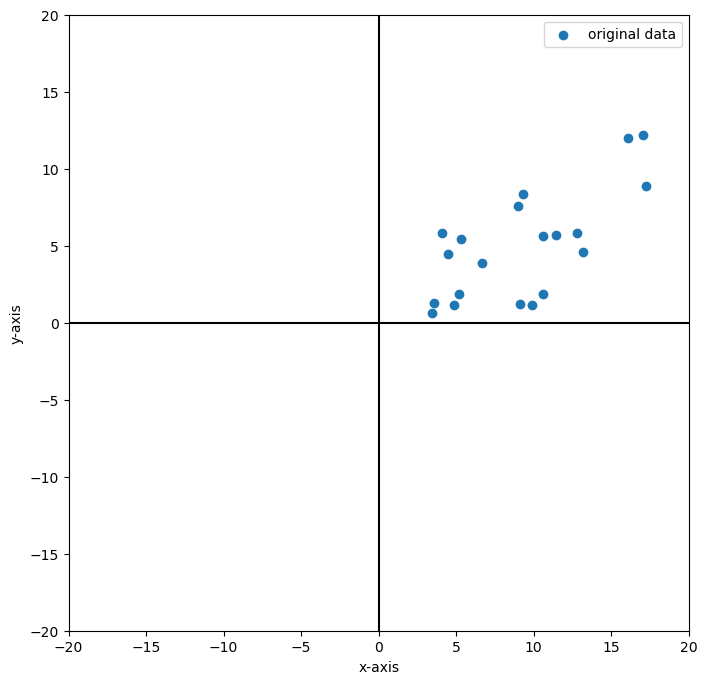

In [44]:
#Randomly generated data
np.random.seed(2)   # generating random numbers setting the random seed to 2
data = np.random.uniform(1,20,(20,2))   # creating a 20x2 array filled with random numbers uniformly distributed between 1 and 20
data[:,1:] = 0.5*data[:,0:1]+np.random.uniform(-4,4,(20,1))   
# introduces some noise to the second variable, making it dependent on the first variable

#Draw original data graph (scatterplot)
size = 20
plt.figure(1,(8,8))  # size of 8x8 inches
plt.scatter(data[:,0],data[:,1],label='original data')    # plots a scatter plot of the first column against the second column
plt.plot([-size,size],[0,0],c='black')   # horizontal black line at y=0
plt.plot([0,0],[-size,size],c='black')   # vertical black line at x=0
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()

In [46]:
#Take the mean point of the original data as the origin
data_norm = data - data.mean(axis = 0)     # normalizing the data by centering it around zero
data_norm

array([[ 0.088 ,  3.3809],
       [ 2.2477,  0.7444],
       [-0.2089,  2.6322],
       [-4.3075, -3.8004],
       [-2.5024, -1.0936],
       [ 3.6057,  0.8437],
       [-5.6389, -3.705 ],
       [-4.6915, -0.5128],
       [ 8.0297,  3.9202],
       [ 7.8888,  7.1948],
       [ 1.4038,  0.6761],
       [-0.0615, -3.7535],
       [-5.7798, -4.3387],
       [-3.9016,  0.4765],
       [-4.0101, -3.1343],
       [ 0.6921, -3.8158],
       [ 3.9719, -0.4162],
       [ 1.4036, -3.1405],
       [ 6.8832,  7.0129],
       [-5.1122,  0.829 ]])

In [48]:
#Calculate covariance matrix
C = np.cov(data_norm.T)     # calculating covariance of the transpose of the normalized matrix
C

array([[20.0979, 10.9159],
       [10.9159, 12.3302]])

In [50]:
#Calculate eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(C)   # variable containing the eigenvalues, the amount of variance captured by each principal component

#Reorder, from large to small
vecs = vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]

In [52]:
#Eigenvector corresponding to the first eigenvalue
vals[0],vecs[:,0]    # extracts the largest eigenvalue

(27.80025909969357, array([0.8171, 0.5765]))

In [54]:
#Eigenvector corresponding to the second eigenvalue
vals[1],vecs[:,1]    # extracts the second largest eigenvalue

(4.627791045140583, array([-0.5765,  0.8171]))

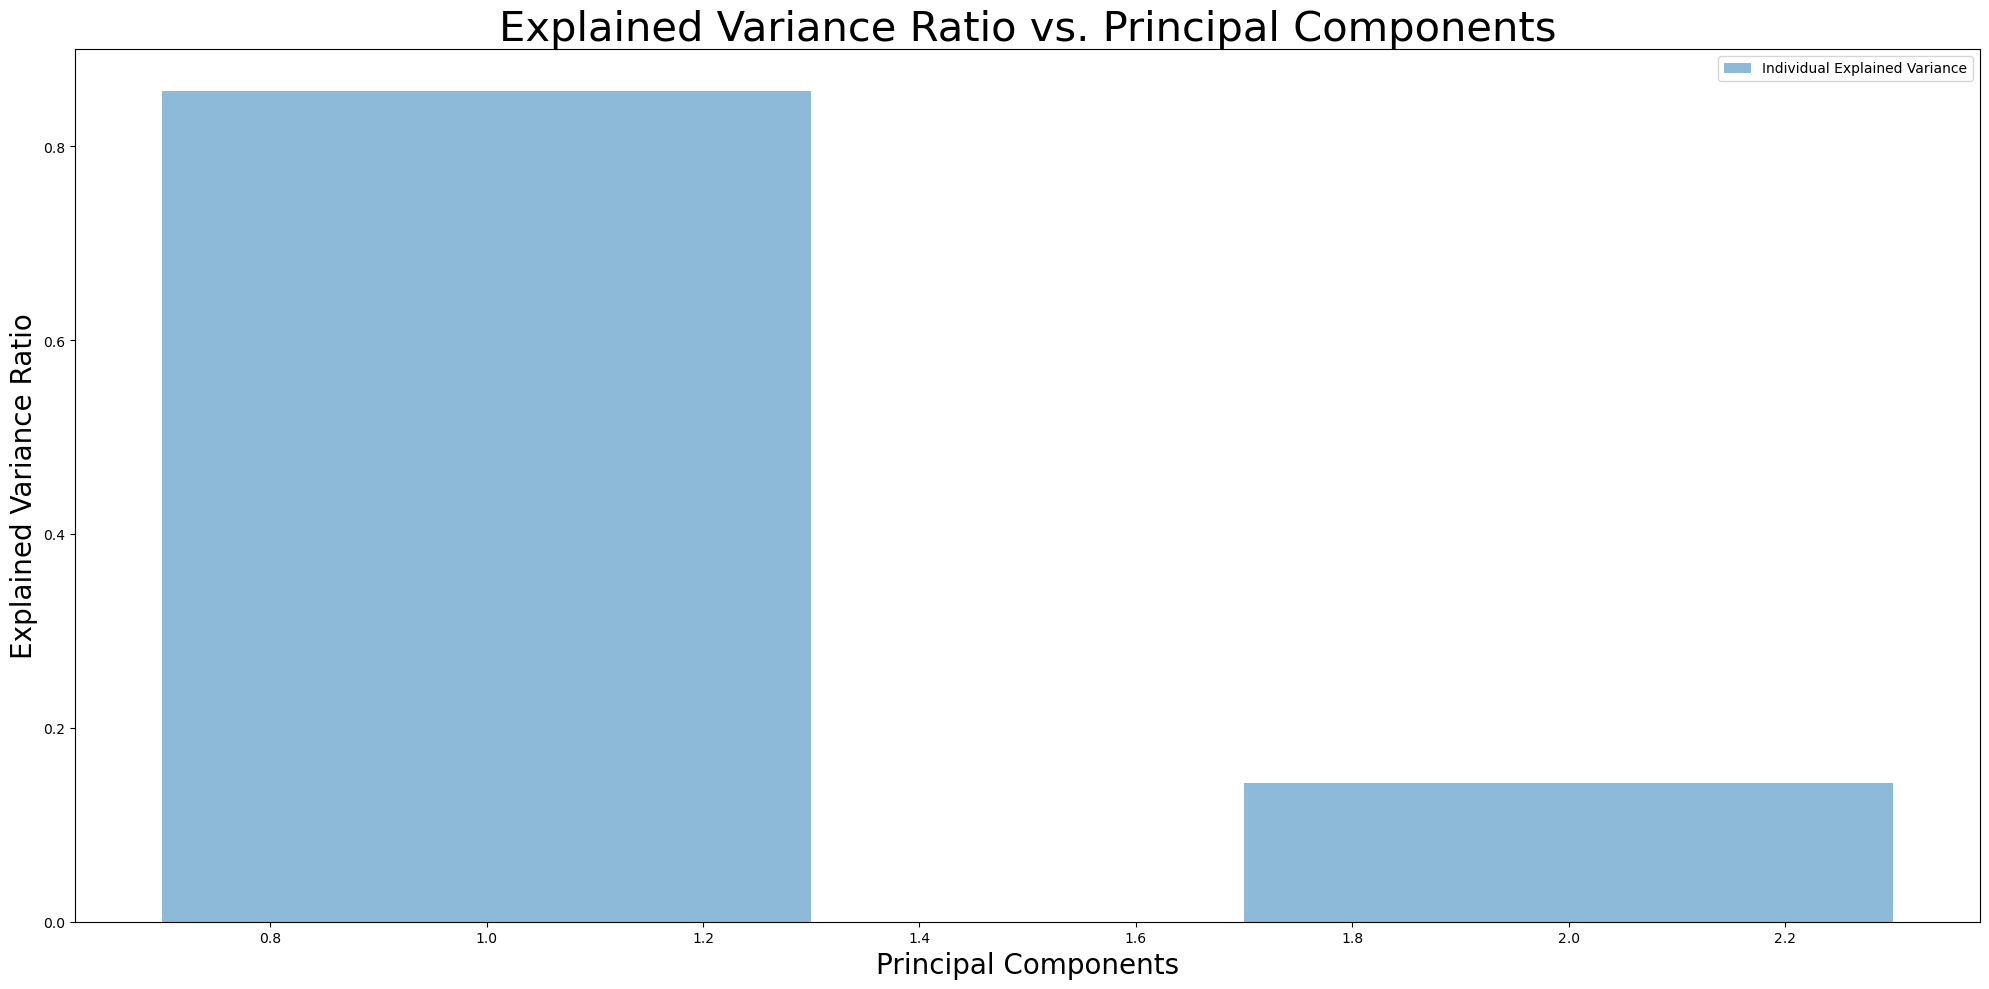

In [56]:
#Scree Plot for variance explained by each principal component
explained_variance = vals / np.sum(vals)  # calculating explained variance
fig = plt.figure(figsize=(20,10))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', 
        label='Individual Explained Variance', width=0.6)
plt.ylabel('Explained Variance Ratio',fontsize = 20)
plt.xlabel('Principal Components',fontsize = 20)
plt.title('Explained Variance Ratio vs. Principal Components',fontsize = 30)
plt.legend(loc='best')
plt.tight_layout()
plt.show() 

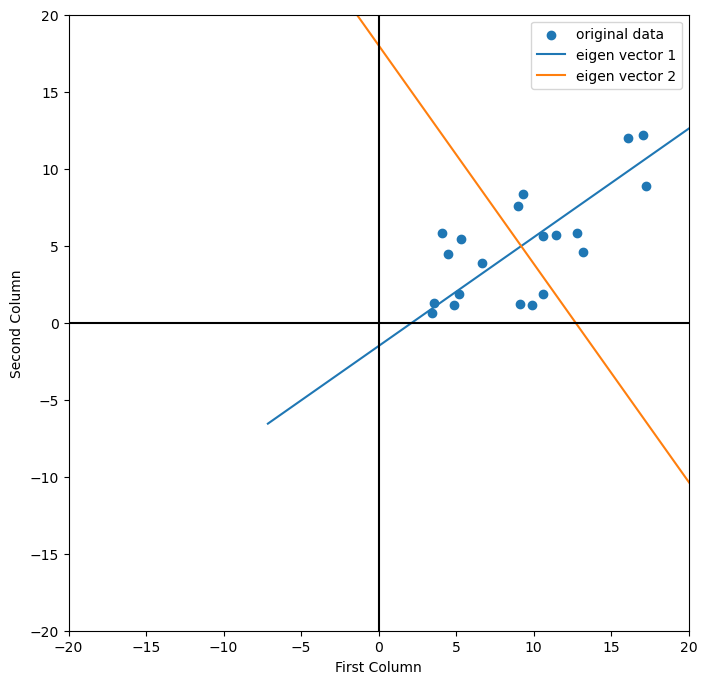

In [58]:
#Draw scatter chart
plt.figure(1,(8,8))
plt.scatter(data[:,0],data[:,1],label='original data')

#Draw the axis where the corresponding direction of the first eigenvector passes the mean point
i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size   # generates a line in the opposite direction of the first eigenvector
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#Draw the axis where the corresponding direction of the second eigenvector passes the mean point
i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#Draw x-axis y-axis
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.xlabel("First Column")
plt.ylabel("Second Column")
plt.legend()
plt.show()

In [60]:
#The projection coordinate of data on principal component one is Y
Q = vecs[:,:1]
print(Q)
Y = np.matmul(data_norm,Q)    # performs matrix multiplication
Y

[[0.8171]
 [0.5765]]


array([[ 2.0211],
       [ 2.2657],
       [ 1.3469],
       [-5.7106],
       [-2.6751],
       [ 3.4325],
       [-6.7434],
       [-4.1289],
       [ 8.8209],
       [10.5938],
       [ 1.5368],
       [-2.2143],
       [-7.2239],
       [-2.9132],
       [-5.0836],
       [-1.6345],
       [ 3.0054],
       [-0.6638],
       [ 9.6673],
       [-3.6991]])

In [62]:
#Add the mean value to restore the data
data_ = np.matmul(Y,Q.T) + data.mean(0)  # reconstructing an approximation of the original data using the first PC
data_

array([[10.8473,  6.1427],
       [11.0471,  6.2837],
       [10.2964,  5.754 ],
       [ 4.5299,  1.6851],
       [ 7.0101,  3.4351],
       [12.0005,  6.9564],
       [ 3.686 ,  1.0896],
       [ 5.8222,  2.597 ],
       [16.4032, 10.063 ],
       [17.8518, 11.0851],
       [10.4515,  5.8635],
       [ 7.3866,  3.7008],
       [ 3.2934,  0.8126],
       [ 6.8156,  3.2979],
       [ 5.0422,  2.0466],
       [ 7.8604,  4.0351],
       [11.6515,  6.7101],
       [ 8.6535,  4.5948],
       [17.0948, 10.551 ],
       [ 6.1735,  2.8448]])

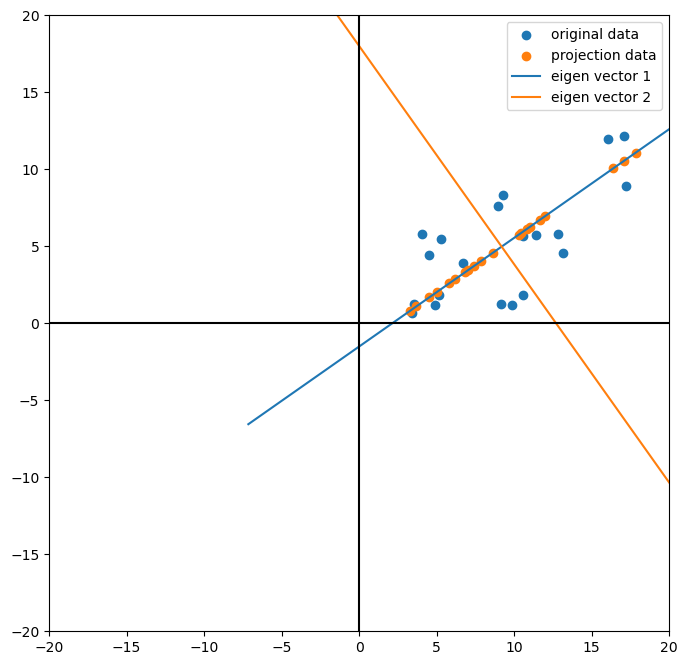

In [64]:
#Draw scatter chart
plt.figure(1,(8,8))
plt.scatter(data[:,0],data[:,1],label='original data')
plt.scatter(data_[:,0],data_[:,1],label='projection data')

#Draw the axis where the corresponding direction of the first eigenvector passes the mean point
i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#Draw the axis where the corresponding direction of the second eigenvector passes the mean point
i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#Draw x-axis y-axis
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
#plt.xlabel('PC1')
#plt.ylabel('PC2')
plt.legend()
plt.show()

### Example 2 (red wine data)

In [84]:
#Import red wine quality data
import csv
file_path="winequality-red.csv"
data = []
with open(file_path, newline='') as file:     # opens the CSV file for reading.
    reader = csv.reader(file, delimiter=';')
    for row in reader:
        data.append(row)

df = pd.DataFrame(data)
header_row = 0
df.columns = df.iloc[header_row]
df=df.iloc[1:]
print(df)

df["fixed acidity"]=pd.to_numeric(df["fixed acidity"])
df["volatile acidity"]=pd.to_numeric(df["volatile acidity"])
df["citric acid"]=pd.to_numeric(df["citric acid"])
df["residual sugar"]=pd.to_numeric(df["residual sugar"])
df["chlorides"]=pd.to_numeric(df["chlorides"])
df["free sulfur dioxide"]=pd.to_numeric(df["free sulfur dioxide"])
df["total sulfur dioxide"]=pd.to_numeric(df["total sulfur dioxide"])
df["density"]=pd.to_numeric(df["density"])
df["pH"]=pd.to_numeric(df["pH"])
df["sulphates"]=pd.to_numeric(df["sulphates"])
df["alcohol"]=pd.to_numeric(df["alcohol"])
df["quality"]=pd.to_numeric(df["quality"])

#Delete Duplicates
df.drop_duplicates(inplace=True)
print(df)

0    fixed acidity volatile acidity citric acid residual sugar chlorides  \
1              7.4              0.7           0            1.9     0.076   
2              7.8             0.88           0            2.6     0.098   
3              7.8             0.76        0.04            2.3     0.092   
4             11.2             0.28        0.56            1.9     0.075   
5              7.4              0.7           0            1.9     0.076   
...            ...              ...         ...            ...       ...   
1595           6.2              0.6        0.08              2      0.09   
1596           5.9             0.55         0.1            2.2     0.062   
1597           6.3             0.51        0.13            2.3     0.076   
1598           5.9            0.645        0.12              2     0.075   
1599             6             0.31        0.47            3.6     0.067   

0    free sulfur dioxide total sulfur dioxide  density    pH sulphates  \
1            

In [86]:
#Logarithmic transformation of the data
df["Log_fixed acidity"]=np.log(df.iloc[:,1])
df["Log_volatile acidity"]=np.log(df["volatile acidity"])
df["Log_residual sugar"]=np.log(df["residual sugar"])
df["Log_chlorides"]=np.log(df["chlorides"])
df["Log_free sulfur dioxide"]=np.log(df["free sulfur dioxide"])
df["Log_total sulfur dioxide"]=np.log(df["total sulfur dioxide"])
df["Log_sulphates"]=np.log(df["sulphates"])
df["Log_alcohol"]=np.log(df["alcohol"])

#Drop previous columns
df.drop(columns = ['fixed acidity', 'volatile acidity','residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','sulphates', 'alcohol'],axis=True,inplace =True)
# removes the original columns before logarithmic transformation from the DataFrame

#Rearrange columns
df = df[['Log_fixed acidity','Log_volatile acidity','citric acid', 'Log_residual sugar', 'Log_chlorides',
       'Log_free sulfur dioxide', 'Log_total sulfur dioxide','density',
       'pH','Log_sulphates','Log_alcohol','quality']]

df.head()

,Log_fixed acidity,Log_volatile acidity,citric acid,Log_residual sugar,Log_chlorides,Log_free sulfur dioxide,Log_total sulfur dioxide,density,pH,Log_sulphates,Log_alcohol,quality
1,-0.356675,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5
2,-0.127833,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382,5
3,-0.274437,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382,5
4,-1.272966,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382,6
6,-0.415515,-0.415515,0.00,0.587787,-2.590267,2.564949,3.688879,0.9978,3.51,-0.579818,2.240710,5


In [90]:
#Dependent variable
x = df.drop('quality',axis=1)    # dropping the 'quality' column

#Target variable
Y = df['quality']

#Create training and test sets
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,test_size = 0.25,random_state=44)  # using 25% of the data as the test set

In [92]:
from sklearn.decomposition import PCA
#Number of components to keep. if n_components is not set all components are kept
pca = PCA(n_components = None)
x_train_graph = pca.fit_transform(x_train)
x_test_graph = pca.transform(x_test)

#Explained variance is a statistical measure of how much variation in a dataset 
#can be attributed to each of the principal components generated by the PCA.
explained_variance = pca.explained_variance_ratio_

print(sorted(explained_variance,reverse = True))

[0.5524445245834212, 0.1750071024808599, 0.09120424079863637, 0.07193527268172334, 0.05719024834701338, 0.025055805188548528, 0.016210035746561758, 0.007046176104583603, 0.0039057727791427083, 8.212895092879344e-07, 5.468363553377101e-32]


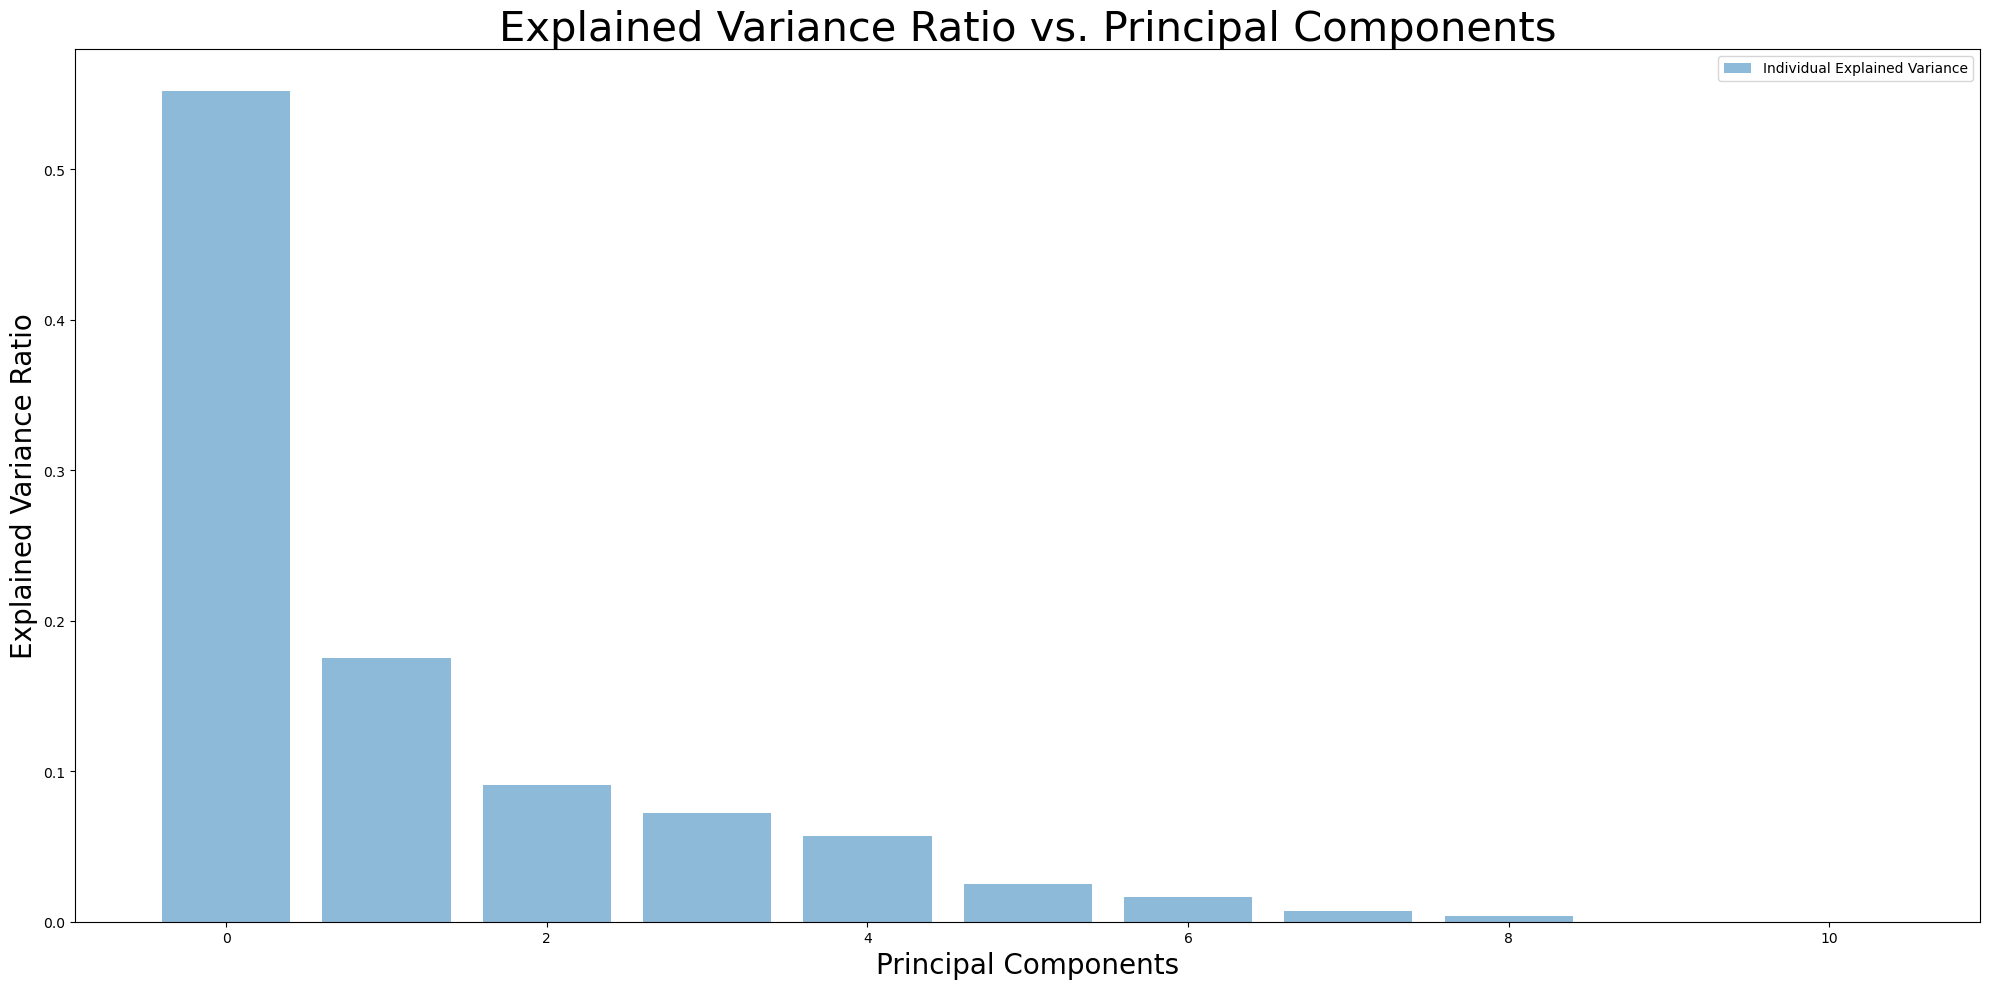

In [108]:
#Scree Plot for variance explained by each principal component
fig = plt.figure(figsize=(20,10))
plt.bar(range(11), explained_variance, alpha=0.5, align='center',label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio',fontsize = 20)
plt.xlabel('Principal Components',fontsize = 20)
plt.title('Explained Variance Ratio vs. Principal Components',fontsize = 30)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [112]:
#According to the above figure, it is reasonable for us to reduce to 5 dimension
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
x_train_PCA = pca.fit_transform(x_train)
x_test_PCA = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance*100)
# indicates the proportion of the total variance in the dataset that is explained by each principal component

[55.2445 17.5007  9.1204  7.1935  5.719 ]


In [114]:
#Start linear regression model for 5 PCA variables
linreg = LinearRegression()

#Match it with the training data, and generate a linear model with train set
linreg.fit(x_train_PCA,Y_train)

#Put x_test_PCA input linear model, and get Y_pred_PCA comes with Y_test for comparison
Y_pred_PCA = linreg.predict(x_test_PCA)

In [116]:
#Start linear regression model for origin 10 variables
linreg = LinearRegression()

#Match it with the training data, and generate a linear model with train set
linreg.fit(x_train,Y_train)

#Put x_test input linear model, and get Y_pred comes with Y_test for comparison
Y_pred = linreg.predict(x_test)

In [120]:
np.unique(Y_train)     # identifies the unique quality ratings

array([3, 4, 5, 6, 7, 8])

In [122]:
np.unique(Y_test)

array([3, 4, 5, 6, 7, 8])

In [124]:
#Grading the quality of red wine to check the classification accuracy
Y_pred_cls = []
for i in Y_pred:
    if i >= 3 and i <= 4:
        Y_pred_cls.append('1')
    elif i > 4 and i <= 6:
        Y_pred_cls.append('2')
    elif i > 6 and i <= 8:
        Y_pred_cls.append('3')

In [126]:
#Grading the quality of red wine to check the classification accuracy
Y_pred_PCA_cls = []
for i in Y_pred_PCA:
    if i >= 3 and i <= 4:
        Y_pred_PCA_cls.append('1')
    elif i > 4 and i <= 6:
        Y_pred_PCA_cls.append('2')
    elif i > 6 and i <= 8:
        Y_pred_PCA_cls.append('3')

In [128]:
#Grading the quality of red wine to check the classification accuracy
Y_test_cls = []
for i in Y_test:
    if i >= 3 and i <= 4:
        Y_test_cls.append('1')
    elif i > 4 and i <= 6:
        Y_test_cls.append('2')
    elif i > 6 and i <= 8:
        Y_test_cls.append('3')

In [142]:
#Show confusion matrix and accurate score for origin 10 variables
from sklearn.metrics import confusion_matrix, accuracy_score

LinearRegression_conf_matrix = confusion_matrix(Y_test_cls, Y_pred_cls)
LinearRegression_acc_score = accuracy_score(Y_test_cls, Y_pred_cls)

print(LinearRegression_conf_matrix)
print("accuracy:",LinearRegression_acc_score*100)

[[  0  14   0]
 [  0 226  53]
 [  0   8  39]]
accuracy: 77.94117647058823


In [146]:
#Show confusion matrix and accurate score for PCA variables
from sklearn.metrics import confusion_matrix, accuracy_score

LinearRegression_conf_matrix = confusion_matrix(Y_test_cls, Y_pred_PCA_cls)
LinearRegression_acc_score = accuracy_score(Y_test_cls, Y_pred_PCA_cls)

print(LinearRegression_conf_matrix)
print("accuracy:",LinearRegression_acc_score*100)

[[  0  13   1]
 [  0 241  38]
 [  0  20  27]]
accuracy: 78.82352941176471


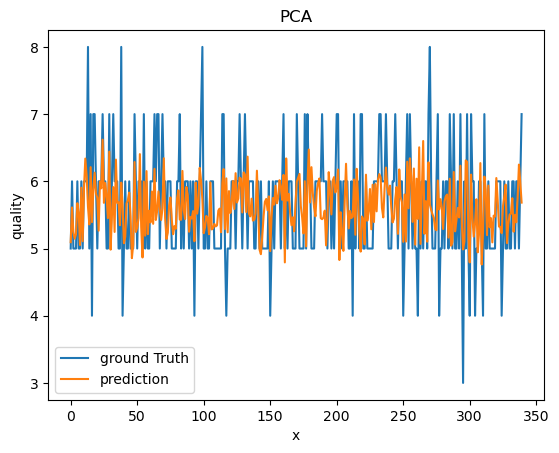

In [140]:
#Compare the coincidence between the real value and the PCA predicted value
xx=range(len(Y_test))
plt.plot(xx,Y_test,label="ground Truth")
plt.plot(xx,Y_pred_PCA,label="prediction")

plt.xlabel("x")
plt.ylabel("quality")
plt.title("PCA")
plt.legend()

plt.show()

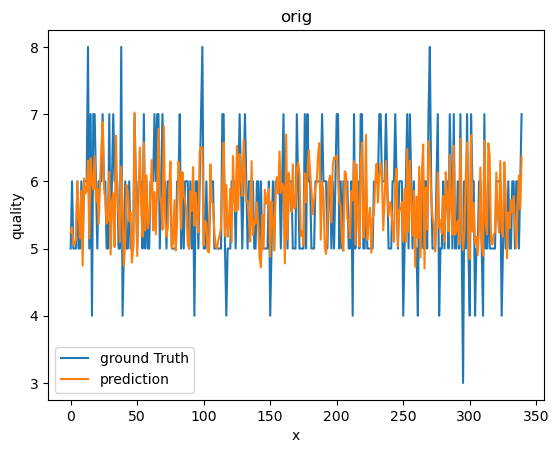

In [148]:
#Compare the coincidence between the real value and the 10 variables predicted value
xx=range(len(Y_test))
plt.plot(xx,Y_test,label="ground Truth")
plt.plot(xx,Y_pred,label="prediction")

plt.xlabel("x")
plt.ylabel("quality")
plt.title("orig")
plt.legend()

plt.show()

## PCA and Privacy

From the previous understanding, we know that one of the disadvantages of PCA is the low interpretability of the Principal components. Principal components are linear combinations of features in the original data, but they are not easy to interpret. For example, after calculating the Principal components, it is difficult to distinguish which are the most important features in the dataset.

This makes us inadvertently think, can low interpretability be used to transform sensitive data? By reducing dimensions, we can operate on the transformed data without knowing the original sensitive privacy data.

Using PCA to preserve privacy
https://blogs.ed.ac.uk/datasciencecdt/2020/03/31/using-pca-to-preserve-privacy/